In [2]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
zomato_df=pd.read_csv('zomatodf.csv')

In [4]:
zomato_df.drop(columns=['index'], inplace=True)

In [5]:
zomato_df

,Restaurant ID,Restaurant Name,Location,Cuisine,Ratings,Rating text,Average Cost for Two,Price Range,Table Booking,Online Delivery,Delivering now,Longitude,Latitude,City,Locality
0,308322,Hauz Khas Social,"9-A & 12, Hauz Khas Village, New Delhi","Continental, American, Asian, North Indian",4.3,Very Good,1600,3,1,1,0,77.194471,28.554285,New Delhi,Hauz Khas Village
1,18037817,Qubitos - The Terrace Cafe,"C-7, Vishal Enclave, Opposite Metro Pillar 417...","Thai, European, Mexican, North Indian, Chinese...",4.5,Excellent,1500,3,1,0,0,77.117701,28.647133,New Delhi,Rajouri Garden
2,312345,The Hudson Cafe,"2524, 1st Floor, Hudson Lane, Delhi University...","Cafe, Italian, Continental, Chinese",4.4,Very Good,850,2,0,1,0,77.204317,28.694947,New Delhi,Delhi University-GTB Nagar
3,307490,Summer House Cafe,"1st Floor, DDA Shopping Complex, Aurobindo Pla...","Italian, Continental",4.1,Very Good,1850,3,1,0,0,77.203809,28.552520,New Delhi,Hauz Khas
4,18241537,38 Barracks,"M-38, Outer Circle, Connaught Place, New Delhi","North Indian, Italian, Asian, American",4.4,Very Good,1600,3,1,0,0,77.222858,28.633025,New Delhi,Connaught Place
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29748,17582627,Senor Iguanas,"961 Hiline Rd, Pocatello, ID 83201",Mexican,3.6,Good,0,1,0,0,0,-112.443300,42.894200,Pocatello,Pocatello
29749,17582625,Sandpiper Restaurant & Lounge,"1400 Bench Rd, Pocatello, ID 83201","American, Seafood, Steak",3.6,Good,40,3,0,0,0,-112.432000,42.901200,Pocatello,Pocatello
29750,17582668,Texas Roadhouse,"560 Bullock Street, Pocatello, ID 83202","American, BBQ, Steak",3.5,Good,45,3,0,0,0,-112.461326,42.910518,Pocatello,Chubbuck
29751,17582498,Riverwalk Cafe,"695 E Main St, Lava Hot Springs, ID 83246","Asian, Thai",3.6,Good,10,1,0,0,0,-112.013200,42.620000,Pocatello,Lava Hot Springs


In [6]:
zomato_df.isnull().sum()

Restaurant ID             0
Restaurant Name           0
Location                  0
Cuisine                 190
Ratings                   0
Rating text               0
Average Cost for Two      0
Price Range               0
Table Booking             0
Online Delivery           0
Delivering now            0
Longitude                 0
Latitude                  0
City                      0
Locality                  0
dtype: int64

In [7]:
zomato_df['Cuisine'].fillna(zomato_df['Cuisine'].mode()[0],inplace=True)

In [8]:
zomato_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Location                0
Cuisine                 0
Ratings                 0
Rating text             0
Average Cost for Two    0
Price Range             0
Table Booking           0
Online Delivery         0
Delivering now          0
Longitude               0
Latitude                0
City                    0
Locality                0
dtype: int64

Encoding Technique 

In [9]:
rating_text = zomato_df['Rating text'].unique()
rating_text

array(['Very Good', 'Excellent', 'Poor', 'Good', 'Average', 'Not rated'],
      dtype=object)

In [10]:
rating_map = {
    'Excellent': 5,
    'Very Good': 4,
    'Good': 3,
    'Average': 2,
    'Poor': 1,
    'Not rated': 0
}
zomato_df['Rating text'] = zomato_df['Rating text'].map(rating_map)

In [11]:
zomato_df['Cuisine'] = zomato_df['Cuisine'].str.split(', ')
cuisines = zomato_df['Cuisine'].explode().unique()
for cuisine in cuisines:
    zomato_df[cuisine] = zomato_df['Cuisine'].apply(lambda x: 1 if cuisine in x else 0)

In [12]:
city_encoder = LabelEncoder()

In [13]:
zomato_df['City'] = city_encoder.fit_transform(zomato_df['City'])

In [14]:
zomato_df['Table Booking'] = zomato_df['Table Booking'].astype(int)
zomato_df['Online Delivery'] = zomato_df['Online Delivery'].astype(int)
zomato_df['Delivering now'] = zomato_df['Delivering now'].astype(int)

In [15]:
zomato_df['Ratings'] = zomato_df['Ratings'].astype(float)
zomato_df['Average Cost for Two'] = zomato_df['Average Cost for Two'].astype(float)
zomato_df['Price Range'] = zomato_df['Price Range'].astype(int)
zomato_df['Longitude'] =zomato_df['Longitude'].astype(float)
zomato_df['Latitude'] = zomato_df['Latitude'].astype(float)

In [16]:
with open('rating_map.pkl', 'wb') as f:
    pickle.dump(rating_map, f)

In [17]:
with open('cuisines_list.pkl', 'wb') as f:
    pickle.dump(cuisines, f)

In [18]:
with open('city_encoder.pkl', 'wb') as f:
    pickle.dump(city_encoder, f)

In [19]:
zomato_df['Rating text'] = zomato_df['Rating text'].astype(int)

In [20]:
zomato_df.drop(columns=['Cuisine'])

,Restaurant ID,Restaurant Name,Location,Ratings,Rating text,Average Cost for Two,Price Range,Table Booking,Online Delivery,Delivering now,...,Southern,Soul Food,Caribbean,Irish,New American,Hawaiian,Cuban,Diner,Bubble Tea,Teriyaki
0,308322,Hauz Khas Social,"9-A & 12, Hauz Khas Village, New Delhi",4.3,4,1600.0,3,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,18037817,Qubitos - The Terrace Cafe,"C-7, Vishal Enclave, Opposite Metro Pillar 417...",4.5,5,1500.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,312345,The Hudson Cafe,"2524, 1st Floor, Hudson Lane, Delhi University...",4.4,4,850.0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,307490,Summer House Cafe,"1st Floor, DDA Shopping Complex, Aurobindo Pla...",4.1,4,1850.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18241537,38 Barracks,"M-38, Outer Circle, Connaught Place, New Delhi",4.4,4,1600.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29748,17582627,Senor Iguanas,"961 Hiline Rd, Pocatello, ID 83201",3.6,3,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29749,17582625,Sandpiper Restaurant & Lounge,"1400 Bench Rd, Pocatello, ID 83201",3.6,3,40.0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29750,17582668,Texas Roadhouse,"560 Bullock Street, Pocatello, ID 83202",3.5,3,45.0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29751,17582498,Riverwalk Cafe,"695 E Main St, Lava Hot Springs, ID 83246",3.6,3,10.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
zomato_df.columns.tolist()

['Restaurant ID',
 'Restaurant Name',
 'Location',
 'Cuisine',
 'Ratings',
 'Rating text',
 'Average Cost for Two',
 'Price Range',
 'Table Booking',
 'Online Delivery',
 'Delivering now',
 'Longitude',
 'Latitude',
 'City',
 'Locality',
 'Continental',
 'American',
 'Asian',
 'North Indian',
 'Thai',
 'European',
 'Mexican',
 'Chinese',
 'Cafe',
 'Italian',
 'Finger Food',
 'Modern Indian',
 'Mughlai',
 'Mediterranean',
 'Fast Food',
 'South Indian',
 'Middle Eastern',
 'Bengali',
 'Tex-Mex',
 'Biryani',
 'Desserts',
 'Seafood',
 'Street Food',
 'Tea',
 'Bakery',
 'Burger',
 'Pizza',
 'Healthy Food',
 'Salad',
 'Beverages',
 'Japanese',
 'British',
 'Spanish',
 'Greek',
 'Charcoal Grill',
 'Indonesian',
 'North Eastern',
 'Burmese',
 'German',
 'Andhra',
 'Chettinad',
 'Goan',
 'Hyderabadi',
 'Awadhi',
 'Arabian',
 'Lebanese',
 'Lucknowi',
 'Ice Cream',
 'Kerala',
 'Rajasthani',
 'Armenian',
 'Sandwich',
 'Malaysian',
 'French',
 'Maharashtrian',
 'Malwani',
 'Portuguese',
 'African',

In [22]:
zomato_df.dtypes.tolist()

[dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtyp

In [23]:
zomato_df.to_csv('zomatodata.csv',index=False)

Model Training - K-Means Clustering

In [24]:
zomato=pd.read_csv('zomatodata.csv')

In [25]:
features = ['Rating text', 'City', 'Average Cost for Two', 'Price Range', 
            'Table Booking', 'Online Delivery', 'Delivering now', 'Longitude', 'Latitude'] + list(cuisines)

In [26]:
X = zomato[features]

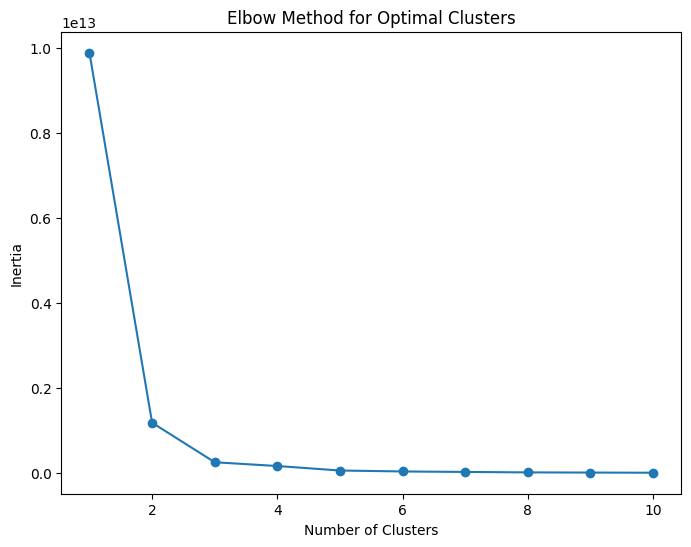

In [27]:
max_clusters = 10
inertia = []

for k in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters+1), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [28]:
kmeans = KMeans(n_clusters=2, random_state=0)
zomato['KMeans_Cluster'] = kmeans.fit(X)

In [29]:
kmeans = KMeans(n_clusters=2, random_state=0)
zomato['KMeans_Cluster'] = kmeans.fit_predict(X)

In [30]:
sil_score_kmeans = silhouette_score(X, zomato['KMeans_Cluster'])
print(f'Silhouette Score KMeans: {sil_score_kmeans:.4f}')

Silhouette Score KMeans: 0.9941


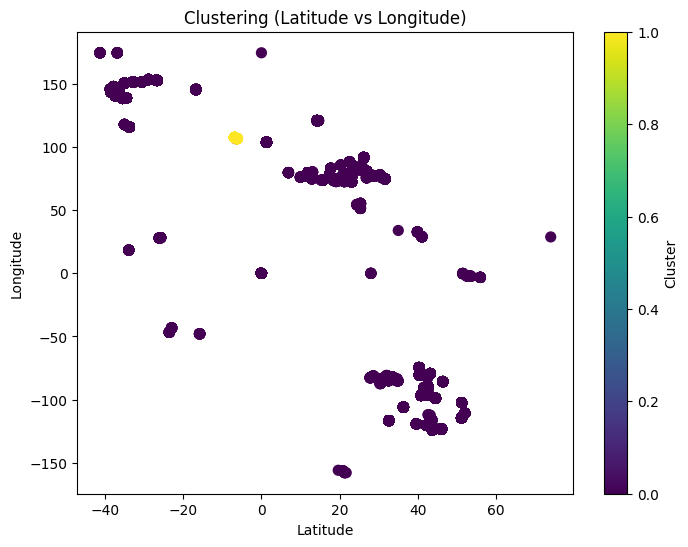

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(zomato['Latitude'],zomato['Longitude'], c=zomato['KMeans_Cluster'], cmap='viridis', s=50)
plt.title('Clustering (Latitude vs Longitude)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.colorbar(label='Cluster')
plt.show()

In [32]:
zomato[['Restaurant ID','Restaurant Name','KMeans_Cluster']].head()

,Restaurant ID,Restaurant Name,KMeans_Cluster
0,308322,Hauz Khas Social,0
1,18037817,Qubitos - The Terrace Cafe,0
2,312345,The Hudson Cafe,0
3,307490,Summer House Cafe,0
4,18241537,38 Barracks,0


Agglomerative Clustering

In [32]:
agg_clustering = AgglomerativeClustering(n_clusters=2)
zomato['Agglomerative_Cluster'] = agg_clustering.fit(X)

: 

In [1]:
agg_clustering = AgglomerativeClustering(n_clusters=2)
zomato['Agglomerative_Cluster'] = agg_clustering.fit_predict(X)

NameError: name 'AgglomerativeClustering' is not defined

In [141]:
sil_score_agg = silhouette_score(X, zomato['Agglomerative_Cluster'])
print(f'Silhouette Score for Agglomerative Clustering: {sil_score_agg:.4f}')

Silhouette Score for Agglomerative Clustering: 0.9941


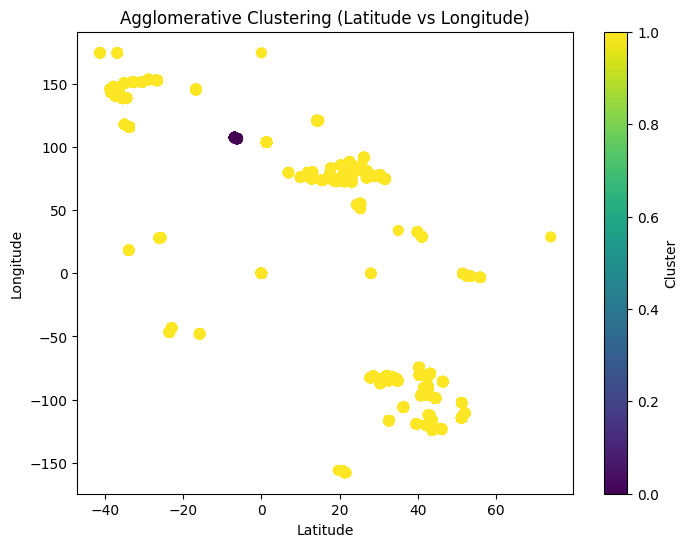

In [142]:
plt.figure(figsize=(8, 6))
plt.scatter(zomato['Latitude'], zomato['Longitude'], c=zomato['Agglomerative_Cluster'], cmap='viridis', s=50)
plt.title('Agglomerative Clustering (Latitude vs Longitude)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.colorbar(label='Cluster')
plt.show()

In [143]:
zomato[['Restaurant ID','Restaurant Name','Agglomerative_Cluster']].head()

,Restaurant ID,Restaurant Name,Agglomerative_Cluster
0,308322,Hauz Khas Social,1
1,18037817,Qubitos - The Terrace Cafe,1
2,312345,The Hudson Cafe,1
3,307490,Summer House Cafe,1
4,18241537,38 Barracks,1


DBSCAN Clustering

In [33]:
dbscan = DBSCAN(eps=0.5, min_samples=10)
zomato['DBSCAN_Cluster'] = dbscan.fit(X)

In [34]:
dbscan = DBSCAN(eps=0.5, min_samples=10)
zomato['DBSCAN_Cluster'] = dbscan.fit_predict(X)

In [35]:
sil_score_dbscan = silhouette_score(X, zomato['DBSCAN_Cluster'])
print(f'Silhouette Score for DBSCAN: {sil_score_dbscan:.4f}')

Silhouette Score for DBSCAN: 0.2745


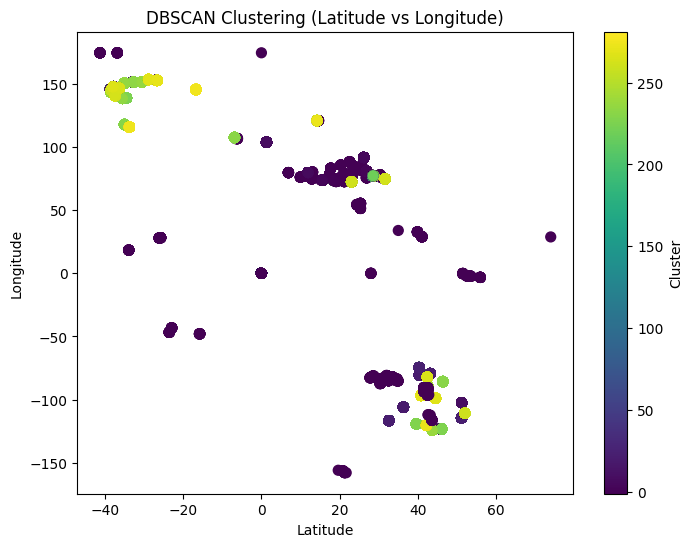

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(zomato['Latitude'], zomato['Longitude'], c=zomato['DBSCAN_Cluster'], cmap='viridis', s=50)
plt.title('DBSCAN Clustering (Latitude vs Longitude)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.colorbar(label='Cluster')
plt.show()

In [37]:
zomato[['Restaurant ID','Restaurant Name','DBSCAN_Cluster']].head()

,Restaurant ID,Restaurant Name,DBSCAN_Cluster
0,308322,Hauz Khas Social,-1
1,18037817,Qubitos - The Terrace Cafe,-1
2,312345,The Hudson Cafe,-1
3,307490,Summer House Cafe,-1
4,18241537,38 Barracks,-1


In [38]:
zomato[['Restaurant ID','Restaurant Name','KMeans_Cluster', 'Agglomerative_Cluster', 'DBSCAN_Cluster']].head()

KeyError: "['Agglomerative_Cluster'] not in index"

KMeans and Agglomerative Clustering are both the better-performing models ,they provide almost identical clustering performance, as indicated by their Silhouette scores of 0.9941.

In [39]:
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

print("Model saved successfully")

Model saved successfully


In [40]:
with open('kmeans_model.pkl', 'rb') as f:
    loaded_kmeans = pickle.load(f)

print("Model loaded successfully")

Model loaded successfully


In [42]:
predictions = loaded_kmeans.predict(X)
predictions

array([0, 0, 0, ..., 0, 0, 0], shape=(29753,), dtype=int32)